<a href="https://colab.research.google.com/github/caalr11/FisicaComputacional1/blob/master/Actividad11/Actividad_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ACTIVIDAD 11

CARLOS ANDRES ARIAS LOPEZ REYES

EJERCICIO 1:


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from numpy import linspace, zeros

%matplotlib inline
plt.style.use( "bmh" )

Modifique el algoritmo de diferencias finitas empleado anteriormente y resuelva la ecuación de onda amortiguada en una dimensión, dada por la ecuación

$$\begin{equation*}
\frac{\partial^2 u}{\partial t^2} + 
 b \frac{\partial u}{\partial t}
 = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2}
   \right) \qquad x \in (0,L], t \in (0,T]
\end{equation*}$$
donde $b \ge 0 $ y $c$ son constantes.

Se proporcionan las condiciones iniciales y a la frontera para encontrar la solución.

$$\begin{eqnarray*}
u(x,0)=I(x) \\
\frac{\partial}{\partial t} u(x,0) = 0 \\
u(0,t)=0 \\
u(L,t)=0 \\
\end{eqnarray*}$$
Utilice diferencias finitas centradas de segundo orden para aproximar la primer derivada $\partial u/\partial t$.

$$\begin{equation*}
\frac{\partial}{\partial t} u(x,t) \approx \frac{u(x,t+k) - u(x,t-k)}{2k}
\end{equation*}$$
Suponga las mismas características del ejemplo presentado anteriormente $L=10$, $c=100$m/s, $t=(0,0.25)$, y coeficiente de amortiguamiento $b=0.5$ con condiciones iniciales $u(x,0) = x(1-x)$ y $\partial u(x,0) / \partial t = 0$ y condiciones a la frontera $u(0,t)=u(L,t)=0$.

In [28]:
def Solver( b, I, V, f, c, L, Nx, C, T, user_action = None ):
  #Resolver u_tt = c^2*u_xx+f              Sobre (0, L)x(0, T)
  x = np.linspace( 0, L, Nx + 1 )
  dx = x[ 1 ] - x[ 0 ]
  dt = C*dx/c
  Nt = int( round( T/dt ) )
  t = np.linspace( 0, Nt*dt, Nt + 1 )
  k = dt
  C1 = ( 1/( 1 + ( b*k/2 ) ) )
  C2 = C**2
  C3 = b*k/2
  C4 = ( 1/( 1 + C1*C3 + C1 ) )
  if f is None or f == 0:
    f = lambda x, t: 0
  if V is None or V == 0:
    V = lambda x: 0
  u0 = zeros( Nx + 1 ) #Solución al nuevo t
  u1 = zeros( Nx + 1 ) #Solución con 1 paso 
  u2 = zeros( Nx + 1 ) #Solución 2 pasos
  import time;
  t0 = time.process_time()
  for i in range( 0, Nx + 1 ): #condiciones iniciales
    u1[ i ] = I( x[ i ] )
  if user_action is not None:
    user_action( u1, x, t, 0 )
  #Fórmula del primer paso
  n = 0
  for i in range( 1, Nx ):
    u0[ i ] = 2*C1*C4*( u1[ i ] ) + dt*V( x[ i ] ) + \
    C4*( C1*C2*( u1[ i - 1 ] - 2*u1[ i ] + u1[ i + 1 ] ) ) + \
    dt**2*f( x[ i ], t[ n ] )
  u0[ 0 ] = 0; u0[ Nx ] = 0  #Condiciones de extremos
  if user_action is not None:
    user_action( u0, x, t, 1 )

#nuevos valores
  
  u2[ : ], u1[ : ] = u1, u0 
  for i in range( 1, Nt ):                              #tiempo t[ n + 1 ]
    for i in range( 1, Nx ):
      u0[ i ] = -C1*u2[ i ] + 2*C*u1[ i ] + \
      ( C1 )*( C3*u2[ i ] + C2*( u1[ i - 1 ] - 2*u1[ i ] + u1[ i + 1 ] ) ) + \
      dt**2*f( x[ i ], t[ n ] )
    u0[ 0 ] = 0; u0[ Nx ] = 0
    if user_action is not None:
      if user_action( u0, x, t, n + 1 ):
        break

#nuevos valores

    u2[ : ], u1[ : ] = u1, u0
  cpu_time = t0 - time.process_time()
  return u0, x, t, cpu_time
def user_action( u0, x, t, n ):
  global user_data
  if 'x' not in user_data:
    user_data[ 'x' ] = x
  if 'u' not in user_data:
    user_data[ 'u' ] = [ ( n, u0 ) ]
  else:
    user_data[ 'u' ].append( ( t[ n ], u0.copy() ) )

u.spahe :  (201,)
x.shape :  (201,)
t.shape :  (5001,)
CPU time :  -3.738187142000001
dt = T/len( user_data[ 'u' ] ) :  4.999000199960008e-05


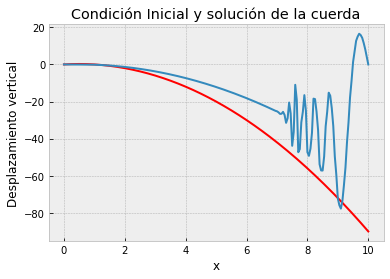

In [29]:
#Ejemplo de cuerda vibrante L=10, t=(0,0.25), c=100m/s
#Variables Solver( I, V, f, c, L, Nx, C, T, user_action = None )
#b= Coeficiente de Amortiguamiento
#I= Condición Incial 
#V= Velocidad Inicial
#f= Función de Forzamiento
#c= Velocidad de Propagación 
#L= Longitud de la Cuerda
#Nx= Núm. de puntos en x
#C= c*k/h Constante de Courant < 1 
#T= Tiempo final de Integración
#def solver( b, I, V, f, c, L, Nx, C, T, user_action = None )
user_data = {}
u, x, t, cpu_time = Solver( 0.5, lambda x: x*( 1 - x ), None,
                           None, 100, 10, 200, 0.1, 0.25,
                           user_action = user_action ) 
print( "u.spahe : ", u.shape )
print( "x.shape : ", x.shape )
print( "t.shape : ", t.shape )
print( "CPU time : ", cpu_time )
print( "dt = T/len( user_data[ 'u' ] ) : ", 0.25/len( user_data[ 'u' ] ) )
I = x*(1-x)
plt.xlabel( "x" )
plt.ylabel( "Desplazamiento vertical" )
plt.title( "Condición Inicial y solución de la cuerda" )
plt.plot( x, I, color = "red" )
plt.plot( x, u )

# EJERCICIO2

Haga el desarrollo del algoritmo de diferencias finitas centradas para resolver la ecuación de onda en 1 dimensión si se tiene un término de forzamiento $f(x,t)$

$$\begin{equation*}
\frac{\partial^2 u}{\partial t^2} = c^2 \left( 
  \frac{\partial^2 u}{\partial x^2}
   \right) + f(x,t) \qquad x \in (0,L], t \in (0,T]
\end{equation*}$$
Con las condiciones iniciales y a la frontera para encontrar la solución.

$$\begin{eqnarray*}
u(x,0) &amp; = &amp; I(x) \\
\frac{\partial}{\partial t} u(x,0) &amp; = &amp; 0 \\
u(0,t) &amp; = &amp; 0 \\
u(L,t) &amp; = &amp; 0 \\
\end{eqnarray*}$$
$$
  \frac{ u_{j}^{n+1} - 2u_{j}^{n} + u_{j}^{n-1} }{ k^{2} } = c^{2} \frac{ u_{j+1}^{n} - 2u_{j}^{n} - u_{j-1}^{n} }{ h^{2} } + f_{j}^{n}
$$
Dado que $f$ depende de la posición y el tiempo que conocemos $f( x_{i}, t_{n} )$. Despejamos $u_{j}^{n+1}:$

$$
  u_{j}^{n+1} = 2u_{j}^{n} - u_{j}^{n-1} + \frac{ k^{2}c^{2} }{ h^{2} }\left[ u_{j+1}^{n} - 2u_{j}^{n} - u_{j-1}^{n} \right] + k^{2} f_{j}^{n}
$$
Ya que $u_{j}^{-}1$ no nos lo dan en la condición incial vamos a aproximar con la derivada siendo:

$$
  \frac{\partial u}{\partial t} = \frac{u_{i}^{n+1}-u_{i}^{k-1}}{2k} = v_{0}
$$
De esto tenemos que:

$$
  u_{i}^{n+1} - u_{i}^{n-1} = 2k*v_{0}, n = 0
$$$$
  u_{i}^{1} - u_{i}^{1} = 2k*v_{0}, n = 0
$$$$
  - u_{i}^{1} = 2k*v_{0} - u_{i}^{1}
$$
Retomamos la segunda ecuación y sustituyendo:

$$
  u_{j}^{1} = 2u_{j}^{n} - u_{j}^{-1} + \frac{ k^{2}c^{2} }{ h^{2} }\left[ u_{j+1}^{0} - 2u_{j}^{0} - u_{j-1}^{0} \right] + k^{2} f_{j}^{0}
$$$$
  u_{j}^{1} = 2u_{j}^{n} + 2k*v_{0} - u_{i}^{1} + \frac{ k^{2}c^{2} }{ h^{2} }\left[ u_{j+1}^{0} - 2u_{j}^{0} - u_{j-1}^{0} \right] + k^{2} f_{j}^{0}
$$
Despejamos $u_{j}^{1}$:

$$
  u_{j}^{1} + u_{i}^{1} = 2u_{j}^{n} + 2k*v_{0} + \frac{ k^{2}c^{2} }{ h^{2} }\left[ u_{j+1}^{0} - 2u_{j}^{0} - u_{j-1}^{0} \right] + k^{2} f_{j}^{0}
$$$$
  2*u_{j}^{1} = 2u_{j}^{n} + 2k*v_{0} + \frac{ k^{2}c^{2} }{ h^{2} }\left[ u_{j+1}^{0} - 2u_{j}^{0} - u_{j-1}^{0} \right] + k^{2} f_{j}^{0}
$$$$
  u_{j}^{1} = u_{j}^{n} + k*v_{0} + \frac{1}{2}\frac{ k^{2}c^{2} }{ h^{2} }\left[ u_{j+1}^{0} - 2u_{j}^{0} - u_{j-1}^{0} \right] + \frac{k^{2} f_{j}^{0}}{2}
$$

In [30]:
def Solver( I, V, f, c, L, Nx, C, T, user_action = None ):
  x = np.linspace( 0, L, Nx + 1 )
  dx = x[ 1 ] - x[ 0 ]
  dt = C*dx/c
  Nt = int( round( T/dt ) )
  t = np.linspace( 0, Nt*dt, Nt + 1 )
  C2 = C**2
  if f is None or f == 0:
    f = lambda x, t: 0
  if V is None or V == 0:
    V = lambda x: 0
  u0 = zeros( Nx + 1 ) #Nuevo t
  u1 = zeros( Nx + 1 ) #Solución 1 paso 
  u2 = zeros( Nx + 1 ) #Solución 2 pasos
  import time;
  t0 = time.process_time()
  for i in range( 0, Nx + 1 ):
    u1[ i ] = I( x[ i ] )
  if user_action is not None:
    user_action( u1, x, t, 0 )
  n = 0 
  for i in range( 1, Nx ):
    u0[ i ] = u1[ i ] + dt*V( x[ i ] ) + \
    0.5*C2*( u1[ i - 1 ] - 2*u1[ i ] + u1[ i + 1 ] ) + \
    0.5*dt**2*f( x[ i ], t[ n ] )
  u0[ 0 ] = 0; u0[ Nx ] = 0
  if user_action is not None:
    user_action( u0, x, t, 1 )

  #Nuevas variables

  u2[ : ], u1[ : ] = u1, u0 
  for i in range( 1, Nt ):
    for i in range( 1, Nx ):
      u0[ i ] = -u2[ i ] + 2*u1[ i ] + \
      C2*( u1[ i - 1 ] - 2*u1[ i ] + u1[ i + 1 ] ) + \
      dt**2*f( x[ i ], t[ n ] )
    u0[ 0 ] = 0; u0[ Nx ] = 0
    if user_action is not None:
      if user_action( u0, x, t, n + 1 ):
        break
    u2[ : ], u1[ : ] = u1, u0
  cpu_time = t0 - time.process_time()
  return u0, x, t, cpu_time
def user_action( u0, x, t, n ):
  global user_data
  if 'x' not in user_data:
    user_data[ 'x' ] = x
  if 'u' not in user_data:
    user_data[ 'u' ] = [ ( n, u0 ) ]
  else:
    user_data[ 'u' ].append( ( t[ n ], u0.copy() ) )

# Ejercicio 3

Resuelva la Ecuación KdV, para el caso de 2 solitones comenzando en $x01 = 0.25*L$ y $x02 = 0.75*L$, con velocidades $c1=0.75$ y $c2=0.01$ e integre hasta que una de las ondas llegue a la frontera.

Grafique las soluciones como en el ejemplo que se proporcionó.

In [31]:
import numpy as np
from scipy.integrate import odeint
from scipy.fftpack import diff as psdiff
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

Representación de la interacción de 2 ondas solitarias


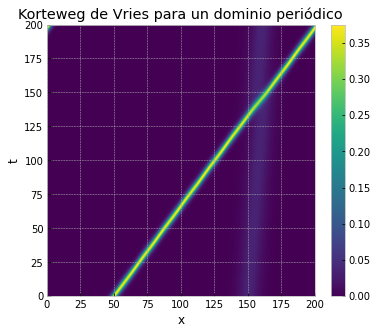

In [32]:
#ECUACIÓN DE KDV
def exKDV( x, c ):
  u = 0.5*c*np.cosh( 0.5*np.sqrt( c )*x )**( -2 )
  return u  
def KDV( u, t, L ):
  ux = psdiff( u, period = L )
  uxxx = psdiff( u, period = L, order = 3 )

  dudt = -6*u*ux - uxxx
  return dudt
def solKDV( u0, t, L ):

  Sol = odeint( KDV, u0, t, args = ( L, ), mxstep = 5000 )
  return Sol

if __name__ == "__main__":
  L = 200.0
  Nx = 256
  dx = L/( Nx - 1.0 )
  x = np.linspace( 0, ( 1 - 1.0/Nx )*L, Nx )
  x01 = 0.25*L
  x02 = 0.75*L
  c1 = 0.75
  c2 = 0.075
  u0 = exKDV( x - x01, c1 ) + exKDV( x - x02, c2 ) 
  T = 200
  Nt = 501
  t = np.linspace( 0, T, Nt ) 
  sol = solKDV(u0, t, L)
  print( "Representación de la interacción de 2 ondas solitarias" )
  import matplotlib.pyplot as plt
  plt.figure( figsize = ( 6, 5 ) )
  plt.imshow( sol[ ::-1, : ], extent = [ 0, L, 0, T ] )
  plt.colorbar()
  plt.xlabel( "x" )
  plt.ylabel( "t" )
  plt.axis( "auto" )
  plt.title( "Korteweg de Vries para un dominio periódico" )
  plt.show()

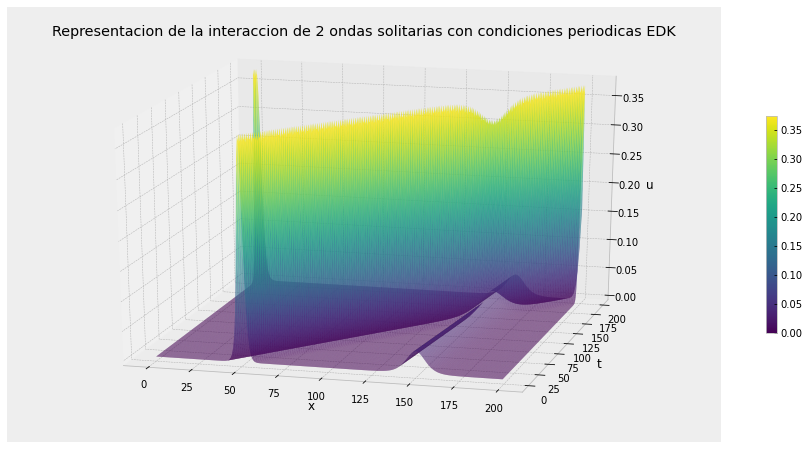

In [33]:
#3D
fig = plt.figure( figsize = ( 16, 8 ) )
ax = fig.add_subplot( 111, projection = "3d" )
SX, ST = np.meshgrid( x, t )
ax.plot_surface( SX, ST, sol, cmap = "viridis", 
                rstride = 1, cstride = 1, alpha = 0.75 )
m = cm.ScalarMappable( cmap = "viridis" )
m.set_array( sol )
plt.colorbar( m, shrink = 0.5 ) 
ax.set_xlabel( "x" )
ax.set_ylabel( "t" )
ax.set_zlabel( "u" )
ax.view_init( elev = 20, azim = -75 )
ax.set_title( "Representacion de la interaccion de 2 ondas solitarias con condiciones periodicas EDK" )
plt.show()

# EJERCICIO 4


Resuelva la Ecuación KdV, para el caso de 3 solitones comenzando en $x01 = 0.25*L$, $x02=0.5*L$, y $x03 = 0.75*L$, con velocidades $c1=0.75$, $c2=0.5$ y $c3=0.25$ e integre hasta que una de las ondas llegue a la frontera.

Grafique las soluciones

Representación de la interacción de 2 ondas solitarias


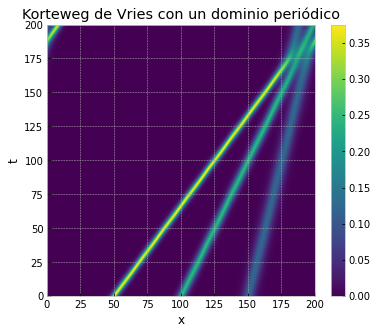

In [34]:
#ECUACIÓN DE KDV PERIÓDICO
def exKDV( x, c ):
  u = 0.5*c*np.cosh( 0.5*np.sqrt( c )*x )**( -2 )
  return u  

def KDV( u, t, L ):

  ux = psdiff( u, period = L )
  uxxx = psdiff( u, period = L, order = 3 )
  dudt = -6*u*ux - uxxx
  return dudt

def solKDV( u0, t, L ):

  Sol = odeint( KDV, u0, t, args = ( L, ), mxstep = 5000 )
  return Sol

if __name__ == "__main__":

  L = 200.0

  Nx = 256

  dx = L/( Nx - 1.0 )                        
  x = np.linspace( 0, ( 1 - 1.0/Nx )*L, Nx ) 
  x01 = 0.25*L
  x02 = 0.50*L
  x03 = 0.75*L
  c1 = 0.75
  c2 = 0.50
  c3 = 0.25
  u0 = exKDV( x - x01, c1 ) + exKDV( x - x02, c2 ) + exKDV( x - x03, c3 )

  T = 200
  Nt = 501
  t = np.linspace( 0, T, Nt ) 
  sol = solKDV(u0, t, L)
  print( "Representación de la interacción de 2 ondas solitarias" )
  import matplotlib.pyplot as plt
  plt.figure( figsize = ( 6, 5 ) )
  plt.imshow( sol[ ::-1, : ], extent = [ 0, L, 0, T ] )
  plt.colorbar()
  plt.xlabel( "x" )
  plt.ylabel( "t" )
  plt.axis( "auto" )
  plt.title( "Korteweg de Vries con un dominio periódico" )
    
  plt.show()

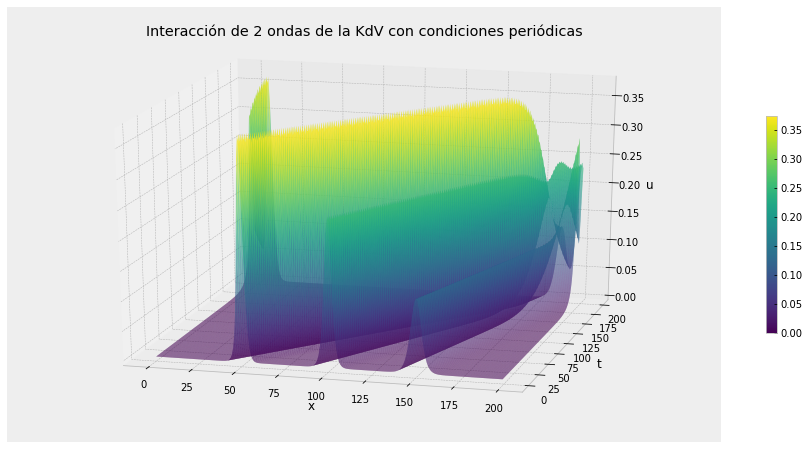

In [35]:
#3D
fig = plt.figure( figsize = ( 16, 8 ) )
ax = fig.add_subplot( 111, projection = "3d" )
SX, ST = np.meshgrid( x, t )
ax.plot_surface( SX, ST, sol, cmap = "viridis", 
                rstride = 1, cstride = 1, alpha = 0.75 )
m = cm.ScalarMappable( cmap = "viridis" )
m.set_array( sol )
plt.colorbar( m, shrink = 0.5 ) 
ax.set_xlabel( "x" )
ax.set_ylabel( "t" )
ax.set_zlabel( "u" )
ax.view_init( elev = 20, azim = -75 )
ax.set_title( "Interacción de 2 ondas de la KdV con condiciones periódicas" )
plt.show()

# EJERCICIO 5


En el ejemplo resuleto anterior, se mostró la evolución de la condición inicial

$$\begin{equation*}
u_0^{(2,1)}(x,y,0) = sin (\pi x) \sin (\frac{\pi y}{2})
\end{equation*}$$
mostrando el modo (1,2) de oscilación natural de la membrana (Ver estas animaciones).

En este Ejercicio se pide mostrar la evolución del modo (1,1), con la condición inicial

$$\begin{equation*}
u_0^{(1,1)}(x,y,0) = \sin (\frac{\pi x}{2}) \sin (\frac{\pi y}{2})
\end{equation*}$$

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

N :  200
D :  0.25
Mx :  50
My :  50
dx,dy ;  0.04 0.04
nsteps :  200


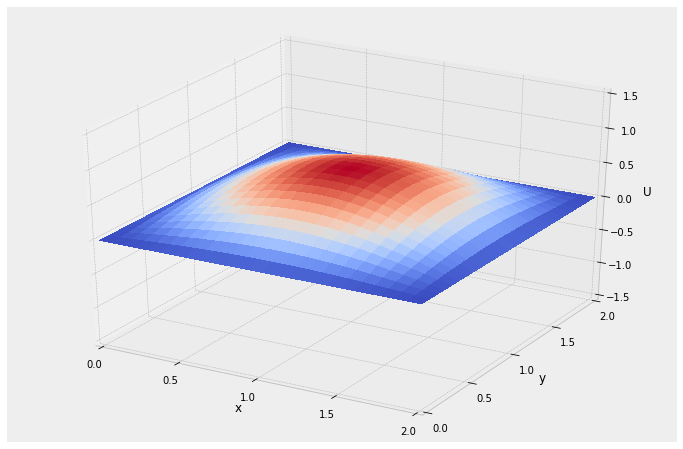

paso : 10.0 t = 0.285


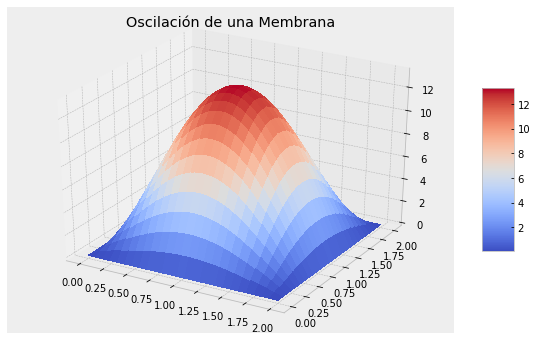

paso : 20.0 t = 0.585


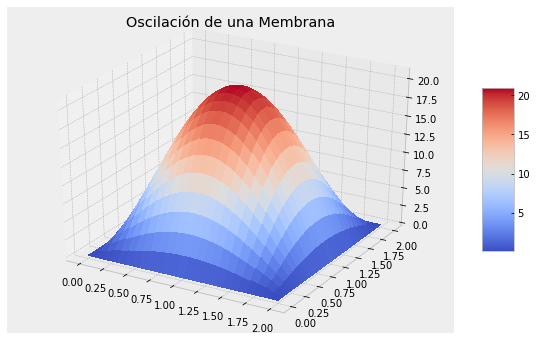

paso : 30.0 t = 0.885


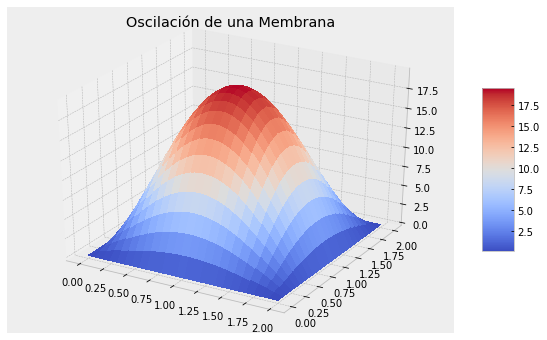

paso : 40.0 t = 1.185


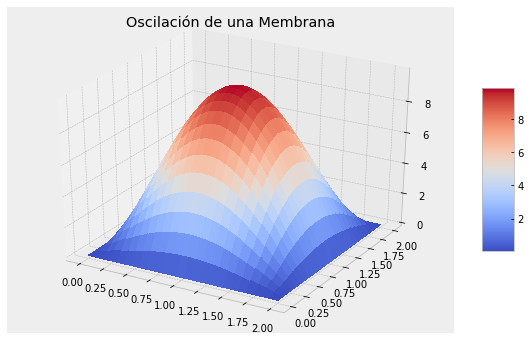

paso : 50.0 t = 1.4849999999999999


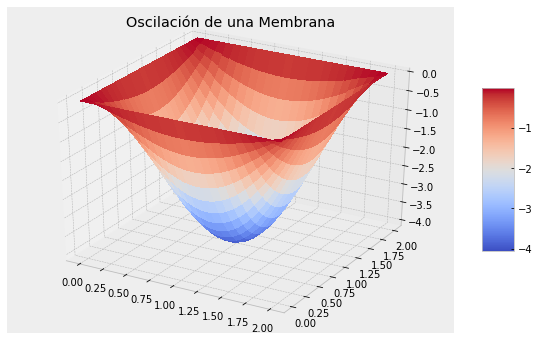

paso : 60.0 t = 1.785


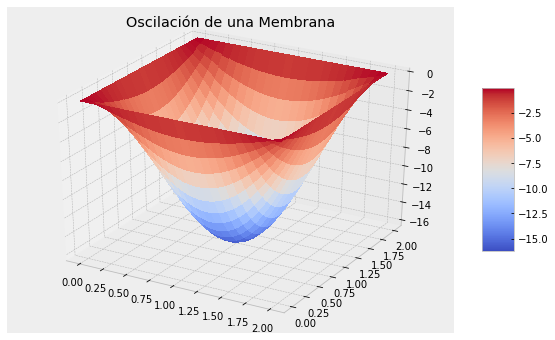

paso : 70.0 t = 2.085


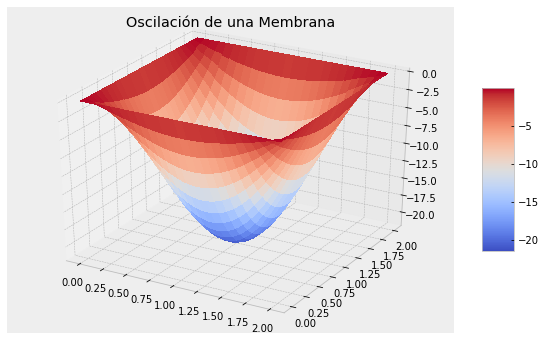

paso : 80.0 t = 2.385


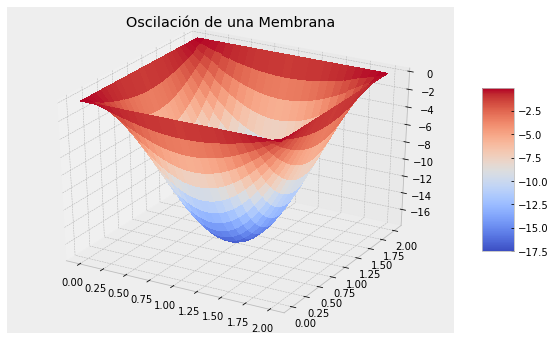

paso : 90.0 t = 2.685


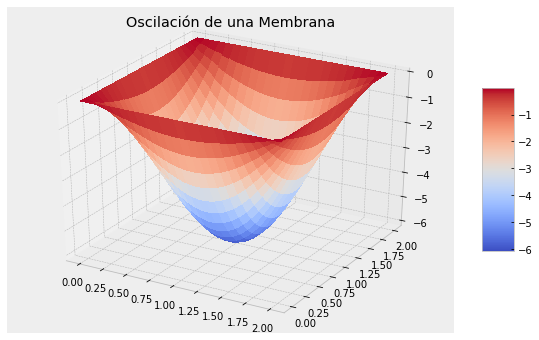

paso : 100.0 t = 2.985


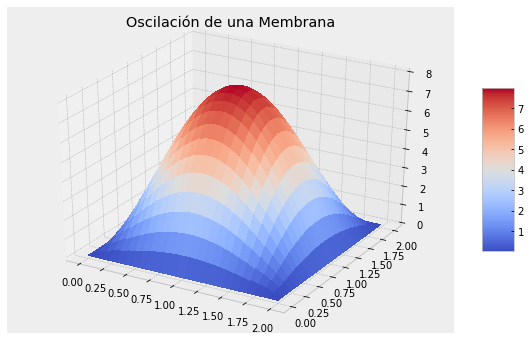

In [37]:
class WaveEquationFD:
  def __init__( self, N, D, Mx, My ):
    self.N = N
    print( "N : ", N )
    self.D = D
    print( "D : ", D )
    self.Mx = Mx
    print( "Mx : ", Mx )
    self.My = My
    print( "My : ", My )
    self.tend = 6
    self.xmin = 0
    self.xmax = 2
    self.ymin = 0
    self.ymax = 2
    self.initialization()
    self.eqnApprox()

  def initialization( self ):
    self.dx = ( self.xmax - self.xmin )/self.Mx
    self.dy = ( self.ymax - self.ymin )/self.My
    print( "dx,dy ; ", self.dx, self.dy )
    self.x = np.arange( self.xmin, self.xmax + self.dx, self.dx )
    self.y = np.arange( self.ymin, self.ymax + self.dy, self.dy )

    self.u0 = lambda r, s: np.sin( np.pi*r/2 )*np.sin( np.pi*s/2 )

    self.v0 = lambda a, b: 0

    self.bxyt = lambda left, right, time: 0

    self.dt = ( self.tend - 0 )/self.N
    self.t = np.arange( 0, self.tend + self.dt/2, self.dt )

    r = 4*self.D*self.dt**2/( self.dx**2 + self.dy**2 );
    assert r < 1, "r is bigger than 1!"

  def eqnApprox( self ):

    self.rx = self.D*self.dt**2/self.dx**2
    self.ry = self.D*self.dt**2/self.dy**2
    self.rxy1 = 1 - self.rx - self.ry 
    self.rxy2 = self.rxy1*2

    self.u = np.zeros( ( self.Mx+1, self.My + 1 ) )
    self.ut = np.zeros( ( self.Mx+1, self.My + 1 ) )
    self.u_1 = self.u.copy()

    for j in range( 1, self.Mx ):
        for i in range( 1, self.My ):
            self.u[ i, j ] = self.u0( self.x[ i ], self.y[ j ] )
            self.ut[ i, j ] = self.v0( self.x[ i ], self.y[ j ] )

  def solve_and_animate( self ):        
    u_2 = np.zeros( ( self.Mx + 1, self.My + 1 ) )
    xx, yy = np.meshgrid( self.x, self.y )
    fig = plt.figure( figsize = ( 12, 8 ) )        
    ax = fig.add_subplot( 111, projection = "3d" ) 
      
    wframe = None  
    k = 0
    nsteps = self.N
    print( "nsteps : ", nsteps )
    while k < nsteps:
      if wframe:
        ax.collections.remove( wframe )          
      self.t = k*self.dt

      for i in range( self.My + 1 ):
        self.u[ i, 0 ] = self.bxyt( self.x[ 0 ], self.y[ i ], self.t )
        self.u[ i, self.Mx ] = self.bxyt( self.x[ self.Mx ], self.y[ i ], self.t )
                
      for j in range( self.Mx + 1 ):
        self.u[ 0, j ] = self.bxyt( self.x[ j ], self.y[ 0 ], self.t )
        self.u[ self.My, j ] = self.bxyt( self.x[ j ], self.y[ self.My] , self.t )

      if k == 0:
        for j in range( 1, self.My ):
          for i in range( 1, self.Mx ):
            self.u[ i, j ] = 0.5*( self.rx*( self.u_1[ i - 1, j ] + self.u_1[ i + 1, j ] ) ) \
                + 0.5*( self.ry*( self.u_1[ i, j - 1 ] + self.u_1[ i, j + 1 ] ) ) \
                + self.rxy1*self.u[ i, j ] + self.dt*self.ut[ i, j ]
      
      else:
        for j in range( 1, self.My ):
          for i in range( 1, self.Mx ):
            self.u[ i, j ] = self.rx*( self.u_1[ i - 1, j ] + self.u_1[ i + 1, j ] ) \
              + self.ry*( self.u_1[ i, j - 1 ] + self.u_1[ i, j + 1 ] ) \
              + self.rxy2*self.u[ i, j ] - u_2[ i, j ]
      
      u_2 = self.u_1.copy()
      self.u_1 = self.u.copy()

      wframe = ax.plot_surface( xx, yy, self.u, cmap = cm.coolwarm, 
                               linewidth = 2, antialiased = False)

      ax.set_xlim3d( 0, 2.0 )
      ax.set_ylim3d( 0, 2.0 )
      ax.set_zlim3d( -1.5, 1.5 )
            
      ax.set_xticks( [ 0, 0.5, 1.0, 1.5, 2.0 ] )
      ax.set_yticks( [ 0, 0.5, 1.0, 1.5, 2.0 ] )
            
      ax.set_xlabel( "x" )
      ax.set_ylabel( "y" )
      ax.set_zlabel( "U" )
            
      plt.pause( 0.05 )
      k += 0.5

      if ( k < 101 and k%10 == 0 ):
        print( "paso :", k, "t =", self.t )

        fig2 = plt.figure( figsize = ( 10, 6 ) )
        ax2 = plt.axes( projection = "3d" )

        my_cmap = plt.get_cmap( "coolwarm" )

        surf = ax2.plot_surface( xx, yy, self.u, 
          cmap = cm.coolwarm, linewidth = 2, antialiased = False )
        fig.colorbar( surf, ax = ax2,
          shrink = 0.5, aspect = 5)
        ax2.set_title( "Oscilación de una Membrana" )
          
        plt.show()

def main():
  simulator = WaveEquationFD( 200, 0.25, 50, 50 )
  simulator.solve_and_animate() #---- No funcionó en Google Colab ---#
  plt.show()
    
if __name__ == "__main__":
  main()

# EJERCICIO 6

En el mismo contexto que el problema anterior, muestra la evolución de la superposición modos (3,1)+ (1,3) dada la condición inicial

$$\begin{equation*}
u_0^{(3,1)+(1,3)}(x,y,0) = \sin (\frac{3 \pi x}{2}) \sin (\frac{\pi y}{2}) + \sin (\frac{\pi x}{2}) \sin (\frac{3 \pi y}{2})
\end{equation*}$$

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

N :  200
D :  0.25
Mx :  50
My :  50
dx,dy ;  0.04 0.04
nsteps :  200


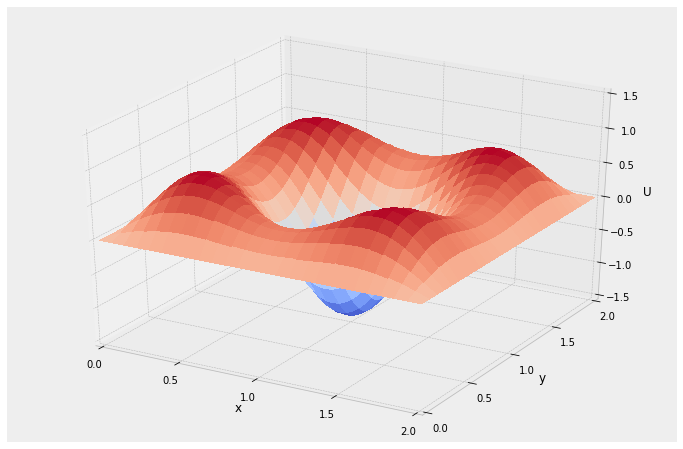

paso : 10.0 t = 0.285


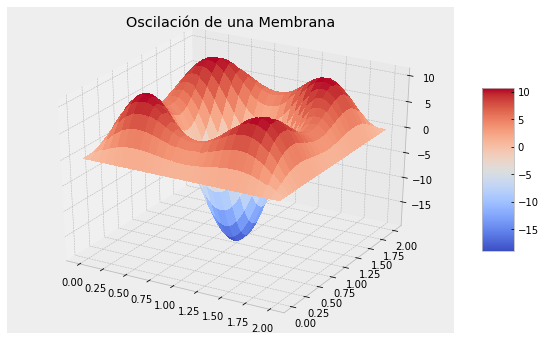

paso : 20.0 t = 0.585


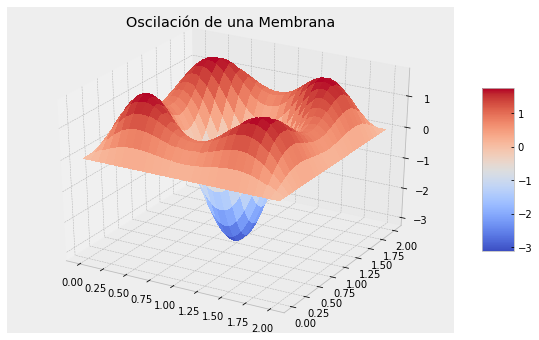

paso : 30.0 t = 0.885


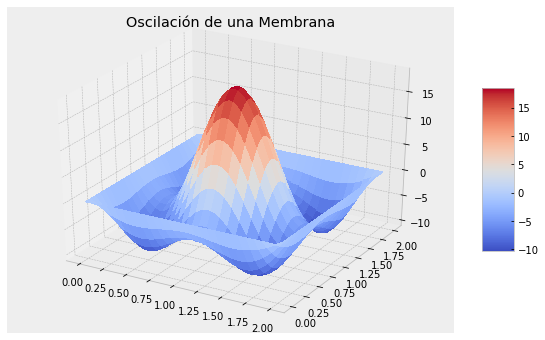

paso : 40.0 t = 1.185


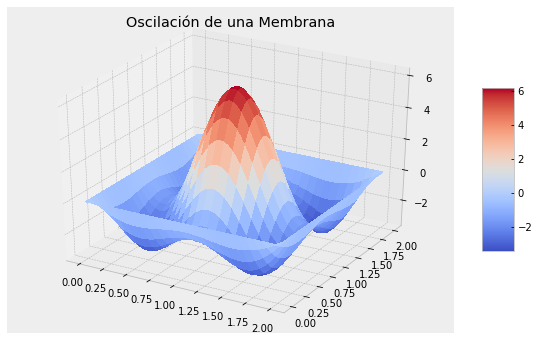

paso : 50.0 t = 1.4849999999999999


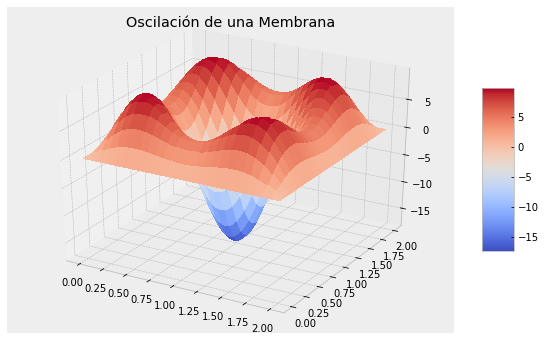

paso : 60.0 t = 1.785


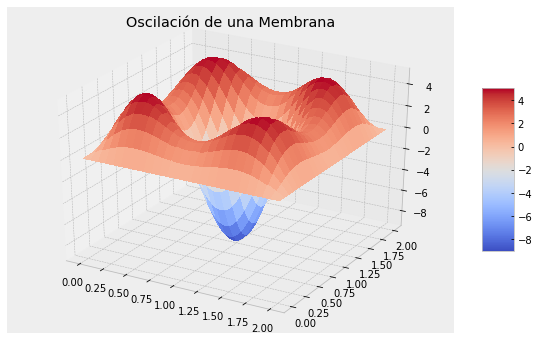

paso : 70.0 t = 2.085


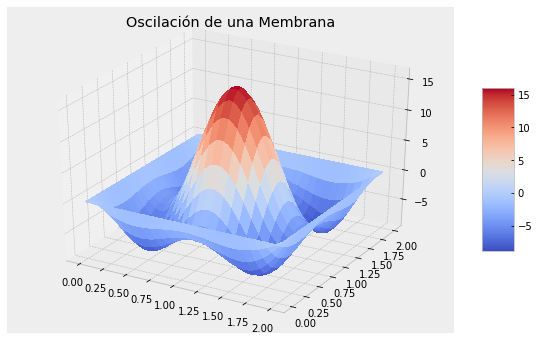

paso : 80.0 t = 2.385


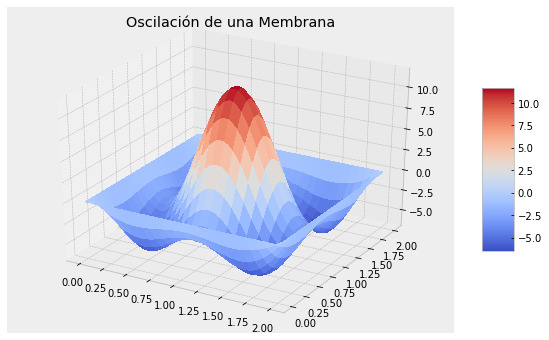

paso : 90.0 t = 2.685


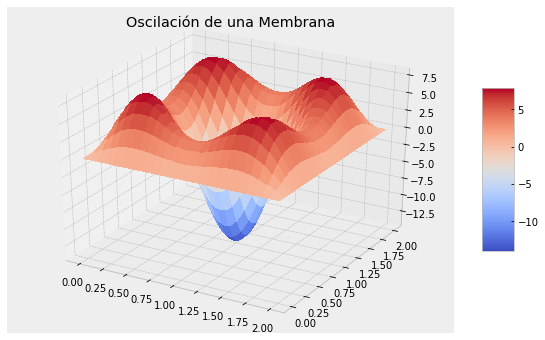

paso : 100.0 t = 2.985


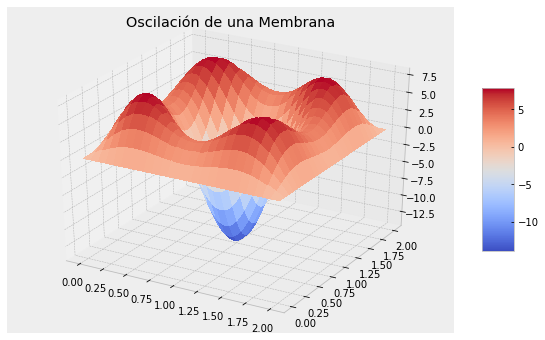

In [39]:
class WaveEquationFD:
  def __init__( self, N, D, Mx, My ):
    self.N = N
    print( "N : ", N )
    self.D = D
    print( "D : ", D )
    self.Mx = Mx
    print( "Mx : ", Mx )
    self.My = My
    print( "My : ", My )
    self.tend = 6
    self.xmin = 0
    self.xmax = 2
    self.ymin = 0
    self.ymax = 2
    self.initialization()
    self.eqnApprox()

  def initialization( self ):
    self.dx = ( self.xmax - self.xmin )/self.Mx
    self.dy = ( self.ymax - self.ymin )/self.My
    print( "dx,dy ; ", self.dx, self.dy )

    self.x = np.arange( self.xmin, self.xmax + self.dx, self.dx )
    self.y = np.arange( self.ymin, self.ymax + self.dy, self.dy )
    self.u0 = lambda r, s: np.sin( 3*np.pi*r/2 )*np.sin( np.pi*s/2 ) \
    + np.sin( np.pi*r/2 )*np.sin( 3*np.pi*s/2 )
    self.v0 = lambda a, b: 0
    self.bxyt = lambda left, right, time: 0
    self.dt = ( self.tend - 0 )/self.N
    self.t = np.arange( 0, self.tend + self.dt/2, self.dt )

    r = 4*self.D*self.dt**2/( self.dx**2 + self.dy**2 );
    assert r < 1, "r is bigger than 1!"

  def eqnApprox( self ):
    self.rx = self.D*self.dt**2/self.dx**2
    self.ry = self.D*self.dt**2/self.dy**2
    self.rxy1 = 1 - self.rx - self.ry 
    self.rxy2 = self.rxy1*2
    self.u = np.zeros( ( self.Mx+1, self.My + 1 ) )
    self.ut = np.zeros( ( self.Mx+1, self.My + 1 ) )
    self.u_1 = self.u.copy()
    for j in range( 1, self.Mx ):
        for i in range( 1, self.My ):
            self.u[ i, j ] = self.u0( self.x[ i ], self.y[ j ] )
            self.ut[ i, j ] = self.v0( self.x[ i ], self.y[ j ] )

  def solve_and_animate( self ):
        
    u_2 = np.zeros( ( self.Mx + 1, self.My + 1 ) ) 
    xx, yy = np.meshgrid( self.x, self.y )     
    fig = plt.figure( figsize = ( 12, 8 ) )        
    ax = fig.add_subplot( 111, projection = "3d" ) 
    wframe = None   
    k = 0
    nsteps = self.N
    print( "nsteps : ", nsteps )
    while k < nsteps:
      if wframe:
        ax.collections.remove( wframe )          
      self.t = k*self.dt
      for i in range( self.My + 1 ):
        self.u[ i, 0 ] = self.bxyt( self.x[ 0 ], self.y[ i ], self.t )
        self.u[ i, self.Mx ] = self.bxyt( self.x[ self.Mx ], self.y[ i ], self.t )
               
      for j in range( self.Mx + 1 ):
        self.u[ 0, j ] = self.bxyt( self.x[ j ], self.y[ 0 ], self.t )
        self.u[ self.My, j ] = self.bxyt( self.x[ j ], self.y[ self.My] , self.t )

      if k == 0:
        for j in range( 1, self.My ):
          for i in range( 1, self.Mx ):
            self.u[ i, j ] = 0.5*( self.rx*( self.u_1[ i - 1, j ] + self.u_1[ i + 1, j ] ) ) \
                + 0.5*( self.ry*( self.u_1[ i, j - 1 ] + self.u_1[ i, j + 1 ] ) ) \
                + self.rxy1*self.u[ i, j ] + self.dt*self.ut[ i, j ]
      
      else:
        for j in range( 1, self.My ):
          for i in range( 1, self.Mx ):
            self.u[ i, j ] = self.rx*( self.u_1[ i - 1, j ] + self.u_1[ i + 1, j ] ) \
              + self.ry*( self.u_1[ i, j - 1 ] + self.u_1[ i, j + 1 ] ) \
              + self.rxy2*self.u[ i, j ] - u_2[ i, j ]
      
      u_2 = self.u_1.copy()
      self.u_1 = self.u.copy()

      wframe = ax.plot_surface( xx, yy, self.u, cmap = cm.coolwarm, 
                               linewidth = 2, antialiased = False)

      ax.set_xlim3d( 0, 2.0 )
      ax.set_ylim3d( 0, 2.0 )
      ax.set_zlim3d( -1.5, 1.5 )
            
      ax.set_xticks( [ 0, 0.5, 1.0, 1.5, 2.0 ] )
      ax.set_yticks( [ 0, 0.5, 1.0, 1.5, 2.0 ] )
            
      ax.set_xlabel( "x" )
      ax.set_ylabel( "y" )
      ax.set_zlabel( "U" )
            
      plt.pause( 0.05 )
      k += 0.5

      if ( k < 101 and k%10 == 0 ):
        print( "paso :", k, "t =", self.t )

        fig2 = plt.figure( figsize = ( 10, 6 ) )
        ax2 = plt.axes( projection = "3d" )
        my_cmap = plt.get_cmap( "coolwarm" )
        surf = ax2.plot_surface( xx, yy, self.u, 
          cmap = cm.coolwarm, linewidth = 2, antialiased = False )
        fig.colorbar( surf, ax = ax2,
          shrink = 0.5, aspect = 5)
        ax2.set_title( "Oscilación de una Membrana" )
          
        plt.show()
def main():
  simulator = WaveEquationFD( 200, 0.25, 50, 50 )
  simulator.solve_and_animate() #---- No funcionó en Google Colab ---#
  plt.show()
    
if __name__ == "__main__":
  main()